# 1. 결정 트리

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from subprocess import check_call

In [ ]:
iris = load_iris()
x = iris.data[:,2:] # 꽃잎의 길이, 너비
y = iris.target

In [ ]:
# decision tree 모형 인스턴스 생성 및 하이퍼파라미터(depth) = 3
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(x,y)

DecisionTreeClassifier(max_depth=3)

In [ ]:
export_graphviz(
    tree_model, # 학습한 모형
    out_file = './iris_tree_model.dot', # .dot 파일 저장 위치
    feature_names = iris.feature_names[2:], # 사용한 변수 이름
    class_names = iris.target_names, # 예측할 타겟 클래스 이름
    rounded=True, # 사각형 끝을 둥글게
    filled=True # 사각형 안 색깔 채우기
)

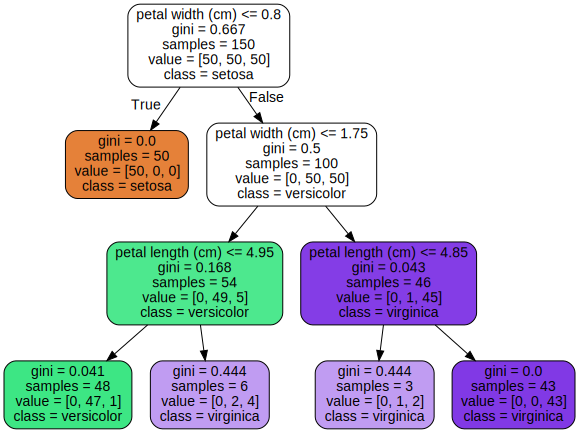

In [ ]:
with open('./iris_tree_model.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

## 엔트로피
결정트리의 기본 아이디어는 sample이 가장 섞이지 않은 상태로 완전히 분류되는 것, 다시 말해서 엔트로피(Entropy)를 낮추도록 만드는 것입니다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import urllib.request

In [ ]:
# 샘플데이터 생성
group_1 = np.array([0.3, 0.4, 0.3])
group_2 = np.array([0.7, 0.2, 0.1])
group_3 = np.array([0.01, 0.01, 0.98])

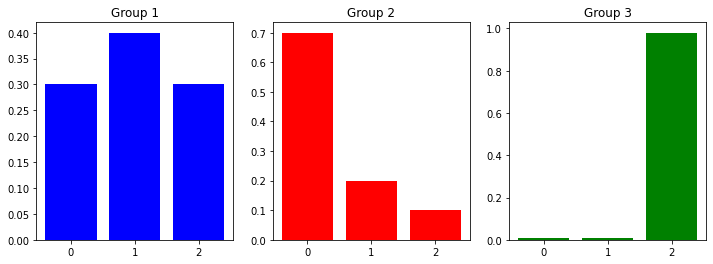

In [ ]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
axes[0].bar(np.arange(3), group_1, color='blue')
axes[0].set_title('Group 1')
axes[1].bar(np.arange(3), group_2, color='red')
axes[1].set_title('Group 2')
axes[2].bar(np.arange(3), group_3, color='green')
axes[2].set_title('Group 3')
plt.show()

In [ ]:
# 엔트로피 구현
def entropy(x):
    return (-x*np.log2(x)).sum()

In [ ]:
# 엔트로피 계산 및 시각화
entropy_1 = entropy(group_1)
entropy_2 = entropy(group_2)
entropy_3 = entropy(group_3)

print(f'Group 1: {entropy_1:.3f}\nGroup 2: {entropy_2:.3f}\nGroup 3: {entropy_3:.3f}')

Group 1: 1.571
Group 2: 1.157
Group 3: 0.161


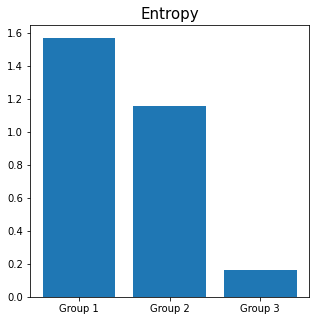

In [ ]:
plt.figure(figsize=(5, 5))
plt.bar(['Group 1', 'Group 2', 'Group 3'], [entropy_1, entropy_2, entropy_3])
plt.title('Entropy', fontsize=15)
plt.show()

## 지니 계수 (Gini Index)

- 클래스들이 공평하게 섞여 있을 수록 지니 계수는 올라갑니다.
- 결정 트리는 지니 불순도를 낮추는 방향으로 가지치기를 진행합니다.

In [ ]:
# 샘플데이터 생성
group_1 = np.array([50, 50])
group_2 = np.array([30, 70])
group_3 = np.array([0, 100])

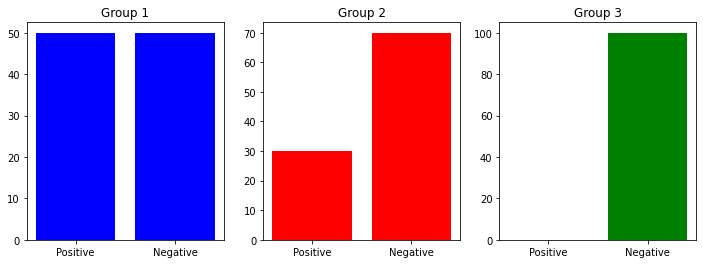

In [ ]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
axes[0].bar(['Positive', 'Negative'], group_1, color='blue')
axes[0].set_title('Group 1')
axes[1].bar(['Positive', 'Negative'], group_2, color='red')
axes[1].set_title('Group 2')
axes[2].bar(['Positive', 'Negative'], group_3, color='green')
axes[2].set_title('Group 3')
plt.show()

In [ ]:
# 지니 계수 구현
def gini(x):
    return 1 - ((x / x.sum())**2).sum()

In [ ]:
# 지니 계수 계산 및 시각화
gini_1 = gini(group_1)
gini_2 = gini(group_2)
gini_3 = gini(group_3)

print(f'Group 1: {gini_1:.3f}\nGroup 2: {gini_2:.3f}\nGroup 3: {gini_3:.3f}')

Group 1: 0.500
Group 2: 0.420
Group 3: 0.000


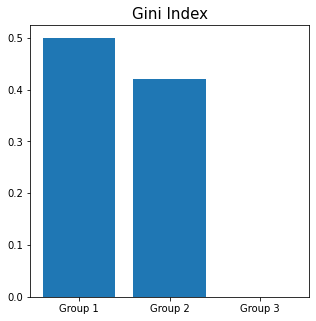

In [ ]:
plt.figure(figsize=(5, 5))
plt.bar(['Group 1', 'Group 2', 'Group 3'], [gini_1, gini_2, gini_3])
plt.title('Gini Index', fontsize=15)
plt.show()

# 2. 교차 검증

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

In [ ]:
iris = load_iris()
x = iris.data
y = iris.target

# x, y shape 확인
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [ ]:
# 결정트리 라이브러리를 dt_clf에 저장시킨다.
dt_clf = DecisionTreeClassifier(random_state=156)

In [ ]:
# kfold 함수를 활용하여 split할 개수인 n_splits의 개수를 정해준다.
kfold = KFold(n_splits=5)

In [ ]:
# 평균 검증 정확도 직접 구하기
cv_accuracy = []
n_iter =0

for train_index, test_index in kfold.split(x):  # feautres 데이터를 위에서 지정한 kfold 숫자로 분할
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    dt_clf.fit(x_train, y_train)
    pred = dt_clf.predict(x_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4) # 소수점 4자리 반올림
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 1.0,  학습 데이터 크기 : 120,  검증 데이터 크기 : 30
#1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 : 0.9667,  학습 데이터 크기 : 120,  검증 데이터 크기 : 30
#2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 : 0.8667,  학습 데이터 크기 : 120,  검증 데이터 크기 : 30
#3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 : 0.9333,  학습 데이터 크기 : 120,  검증 데이터 크기 : 30
#4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 : 0.7333,  학습 데이터 크기 : 120,  검증 데이터 크기 : 30
#5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

In [ ]:
# 평균 검증 정확도 쉽게 구하기
score = cross_val_score(dt_clf, x, y, scoring='accuracy', cv=5)

print('교차 검증별 정확도:', np.round(score, 4))
print('평균 검증 정확도:', np.round(np.mean(score), 4))

교차 검증별 정확도: [0.9667 0.9667 0.9    0.9333 1.    ]
평균 검증 정확도: 0.9533


# 3. 그리드 서치

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd

In [ ]:
iris = load_iris()
x = iris.data
y = iris.target

In [ ]:
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()
parameters = {'max_depth' : [1, 2, 3], 'min_samples_split' : [2, 3]}

In [ ]:
# param_grid의 하이퍼 파라미터를 3개의 train, test의 fold 로 나누어 테스트 수행 설정
# refit이란 True가 디폴트 -> True이면 가장 좋은 파라미터 설정으로 계속 재학습시킨다. 

grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

In [ ]:
# GridSearchCV 결과를 추출해 DataFrame 으로 변환

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df
scores_df[['params', 
		'mean_test_score',
		'rank_test_score',
 		'split0_test_score',
		'split1_test_score',
		'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [ ]:
print('GridSearchCV 최적 파라미터 : ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터 :  {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.9750


In [ ]:
# GridSearchCV 의 refit 으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

In [ ]:
# 위의 estimator로 예측
pred = estimator.predict(x_test)
print('테스트 데이트 세트 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이트 세트 정확도 : 0.9667
